In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

In [11]:
columns=['Index', 'Espessura', 'Tamanha', 'Forma', 'Marginal',
         'Epitelial','Núcleos', 'Cromatina', 'Núcleolos', 
         'Mitoses', 'Diagnostico']
df = pd.read_csv('breast-cancer-wisconsin.data', names=columns)
df.shape

(699, 11)

In [12]:
#Diagnostico: 2 -> Benigno / 4 -> Maligno
df.head()

,Index,Espessura,Tamanha,Forma,Marginal,Epitelial,Núcleos,Cromatina,Núcleolos,Mitoses,Diagnostico
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [15]:
obj_columns = df.select_dtypes(['object']).columns
df[obj_columns] = df[obj_columns].apply(lambda x: pd.factorize(x)[0])
df.describe()

,Index,Espessura,Tamanha,Forma,Marginal,Epitelial,Núcleos,Cromatina,Núcleolos,Mitoses,Diagnostico
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,1.480687,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.582864,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,1.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [19]:
X = df.drop(columns=['Index', 'Diagnostico']).to_numpy()
y = df['Diagnostico']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [23]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"SVM accuracy: {acc}")

SVM accuracy: 0.9657142857142857


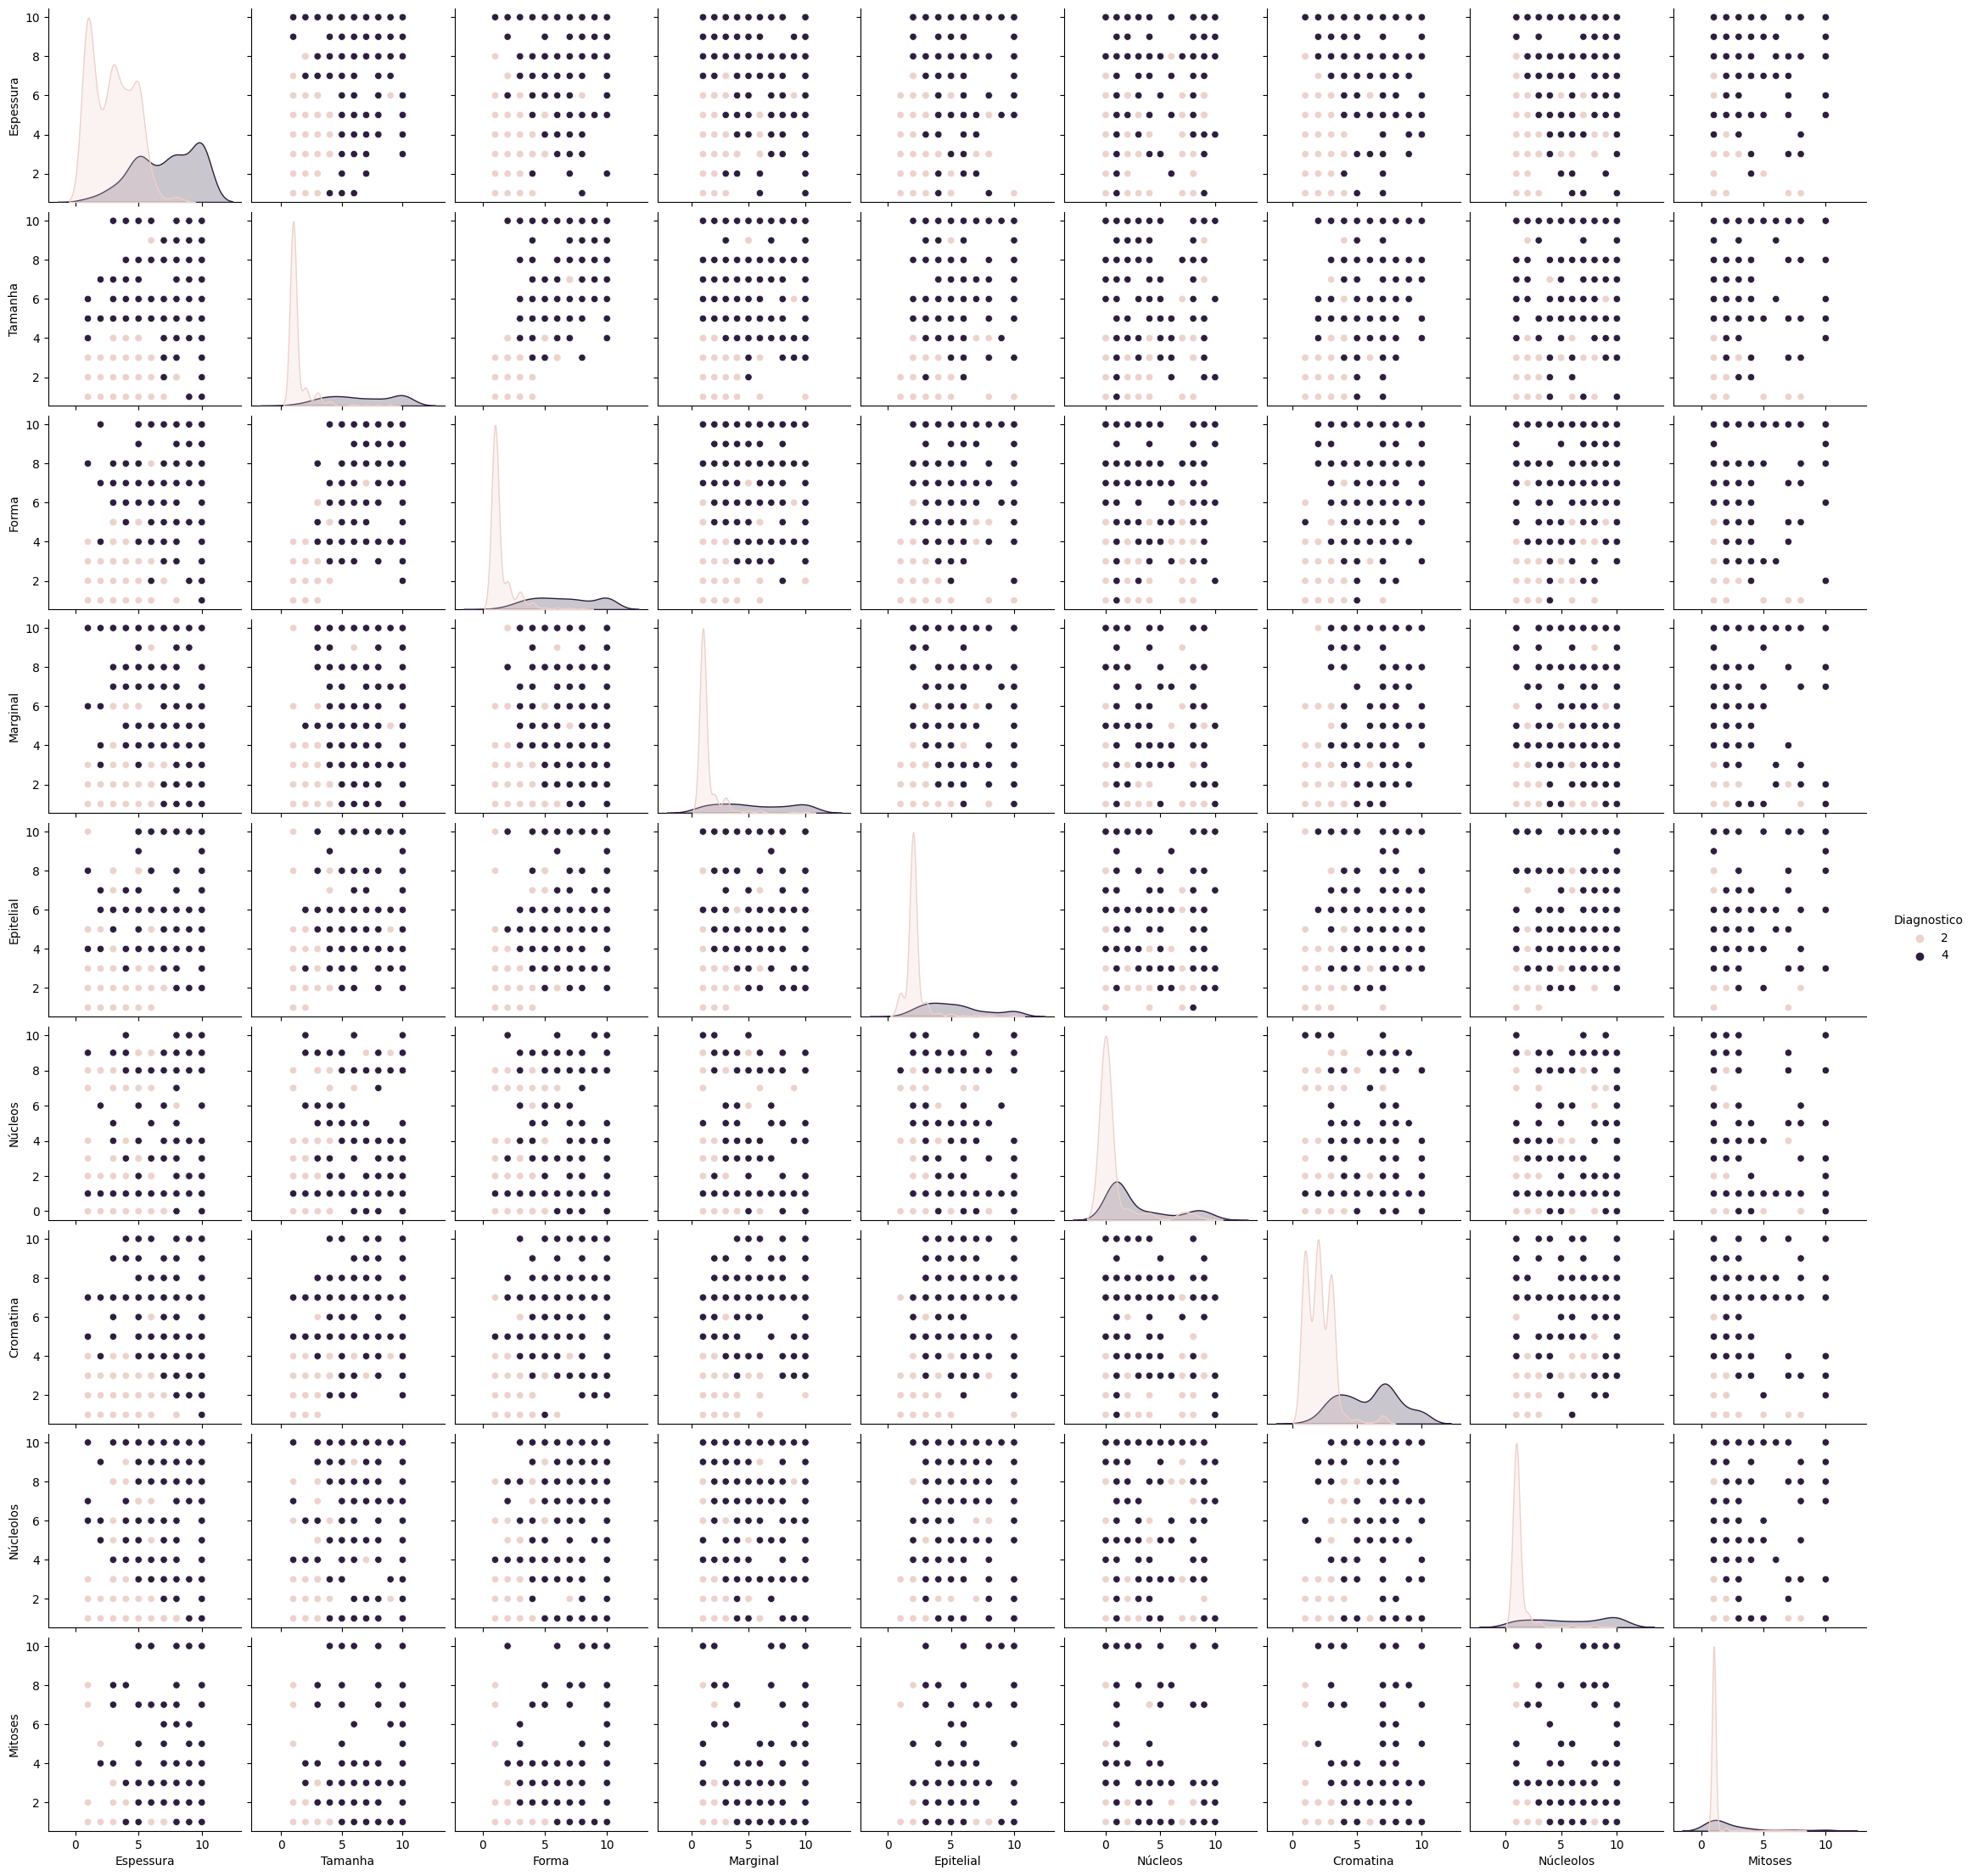

In [29]:
sns.pairplot(df.drop(columns=["Index"]), hue="Diagnostico")

In [45]:
X_bin = df.drop(columns=['Index', 'Tamanha', 'Marginal', 'Epitelial','Núcleos', 
                         'Cromatina', 'Núcleolos', 'Mitoses', 'Diagnostico']).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_bin, y, stratify=y)

In [35]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"SVM accuracy: {acc}")

SVM accuracy: 0.9085714285714286


c:\users\svcj238521\appdata\local\programs\python\python38\lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'color'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


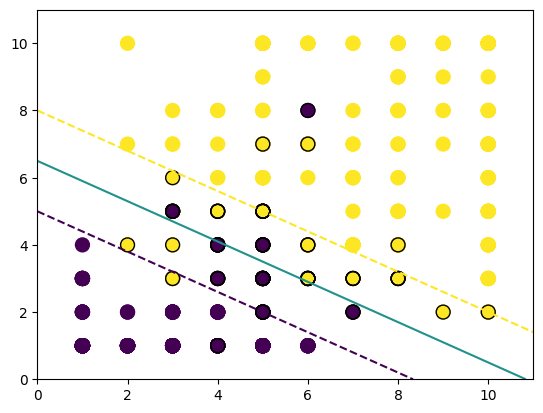

In [42]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    plot_method="contour",
    color="k",
    levels=[-1, 0, 1],
    linestyles=["--", "-", "--"],
    ax=ax
)

ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k"
)

plt.show()

In [46]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"SVM score: {acc}")

SVM score: 0.9257142857142857


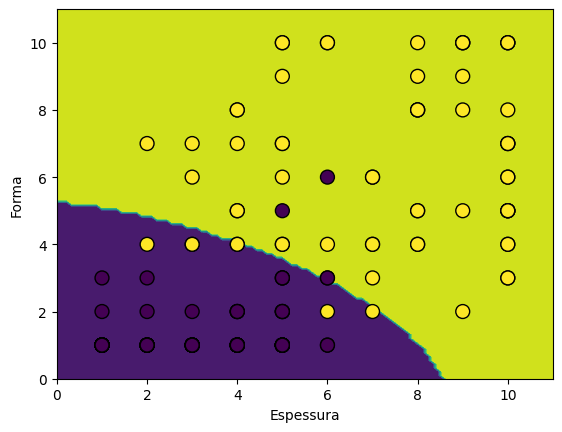

In [55]:
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_test,
    response_method="predict",
    xlabel='Espessura',
    ylabel='Forma',
    ax=ax
)
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, s=100, edgecolors="k")
plt.show()

In [43]:
X = df.drop(columns=['Index', 'Diagnostico']).to_numpy()
y = df['Diagnostico']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [44]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"SVM score: {acc}")

SVM score: 0.9885714285714285
